### Titanic
https://www.kaggle.com/c/titanic/

In [135]:
%pylab inline

import pandas as pd
import numpy as np

train = pd.DataFrame.from_csv("data/train.csv")
test  = pd.DataFrame.from_csv("data/test.csv")

# Add the survived col to test and merge with train
test["Survived"] = np.nan
test["Cat"] = "test"
train["Cat"] = "train"
merged = train.append(test)

# All cols names
allCols = list(merged.columns.values)
    
merged.head()


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


,Age,Cabin,Cat,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,,
1,22,NaN,train,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38,C85,train,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26,NaN,train,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35,C123,train,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35,NaN,train,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


#### Clean Data

In [136]:
# Nan Check
for col in allCols:
    if merged[col].count() - len(merged[col]):
        print "NA in merged${0}".format(col)
        
# Not sure if meaningfull
merged['Age'] = merged['Age'].fillna(merged['Age'].median(skipna=True))
merged['Embarked'] = merged['Embarked'].fillna('S')
merged['Fare'] = merged['Fare'].fillna(merged['Fare'].median(skipna=True))

NA in merged$Age
NA in merged$Cabin
NA in merged$Embarked
NA in merged$Fare
NA in merged$Survived


####Check Values

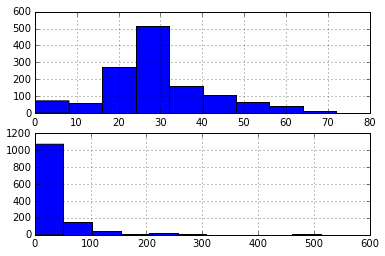

In [180]:
fig, axs = plt.subplots(2,1)

merged['Age'].hist(ax=axs[0])
merged['Fare'].hist(ax=axs[1])

#### Process labels

In [138]:
from sklearn import preprocessing

# Label => int
sexEncoder = preprocessing.LabelEncoder()
sexEncoder.fit(["female","male"])
merged["EncodedSex"] = sexEncoder.transform(merged["Sex"])

# Label => int
embarkedEncoder = preprocessing.LabelEncoder()
embarkedEncoder.fit(["C","S","Q"])
merged["EncodedEmbarked"] = embarkedEncoder.transform(merged["Embarked"])

#### Split merged test

In [139]:
train = merged[merged["Cat"] == "train"]
test = merged[merged["Cat"] == "test"]

# Select only helpfull features ?
features = (train["EncodedSex"],train["Fare"],train["Age"],train["EncodedEmbarked"]);
testFeatures = (test["EncodedSex"],test["Fare"],test["Age"],test["EncodedEmbarked"])

X = numpy.column_stack(features)
y = train["Survived"]

#### Actual logistic regression

In [140]:
from sklearn.linear_model import LogisticRegression

# Logit
logit = LogisticRegression()
logit = logit.fit(X,y)

# Make pred
X_test = numpy.column_stack(testFeatures)
pred = logit.predict(X_test)


#### Prepare CSV

In [141]:

solution = pd.DataFrame(data={'PassengerId':test.index ,'Survived':pred.astype(int)})
solution.to_csv("data/solution.csv", index=False)
solution.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


#### Cross validation

In [153]:
from sklearn.cross_validation import train_test_split

# Only from train
train = merged[merged["Cat"] == "train"]

# Select only helpfull features
X = numpy.column_stack(features)
y = train["Survived"]

# Make CV train/validation
X_train,X_validation,y_train,y_validation = train_test_split(X,y)

#### Analyse performance 

In [170]:
from sklearn.metrics import classification_report, accuracy_score

# Logit
logit = LogisticRegression()
logit = logit.fit(X_train,y_train)

pred = logit.predict(X_validation)
print classification_report(pred,y_validation)

             precision    recall  f1-score   support

        0.0       0.82      0.82      0.82       141
        1.0       0.70      0.70      0.70        82

avg / total       0.78      0.78      0.78       223



#### Random Forest

             precision    recall  f1-score   support

        0.0       0.85      0.83      0.84       144
        1.0       0.71      0.73      0.72        79

avg / total       0.80      0.80      0.80       223

0.798206278027


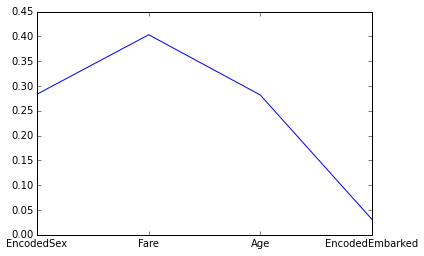

In [196]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc = rfc.fit(X_train,y_train)

# Complete report
pred = rfc.predict(X_validation)
print classification_report(pred,y_validation)

# If you only need the score value
print rfc.score(X_validation,y_validation)

# Adding feature name on xticks
x = range(0,len(features))
labels = map(lambda f:f.name, features)
plt.xticks(x, labels)

# Showing feature importance
plt.plot(x, rfc.feature_importances_)
plt.show()